# Stress-Strain Analysis: Finding Young's Modulus

**ENG1014 - Engineering Numerical Analysis**  
**Workshop-11 Linear Regression**

**Goal**: Find Young's Modulus (E) from the linear elastic region using Hooke's Law: $\sigma = E \cdot \epsilon$


## Step 1: Import Libraries and Load Data


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Load stress-strain data
df = pd.read_csv('stress_strain_data.csv')
strain = df['e_true'].values
stress = df['Sigma_true'].values

print(df.head())
print(f"Strain range: {strain.min():.6f} to {strain.max():.6f}")
print(f"Stress range: {stress.min():.2f} to {stress.max():.2f} MPa")


   Unnamed: 0   Time[s]    e_true  Sigma_true
0           0  0.100024  0.000012   -0.109347
1           2  0.300073  0.000012   -0.159358
2           5  0.600023  0.000012    0.081607
3           6  0.700047  0.000013   -0.040296
4           7  0.800072  0.000012    0.015481
Strain range: 0.000012 to 0.122682
Stress range: -0.16 to 648.00 MPa


## Step 2: Visualize the Stress-Strain Curve


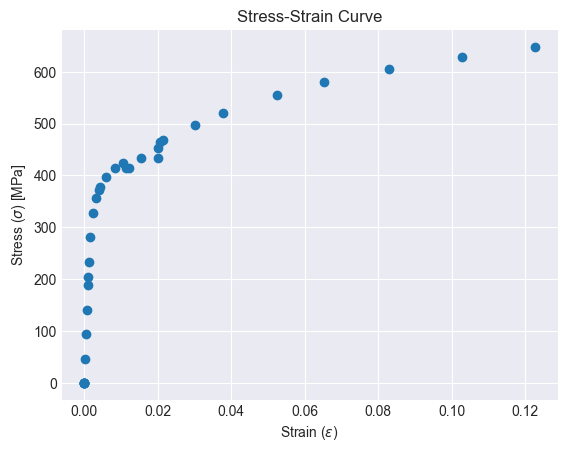

In [67]:

plt.plot(strain, stress, 'o')
plt.xlabel(r'Strain ($\epsilon$)')
plt.ylabel(r'Stress ($\sigma$) [MPa]')
plt.title('Stress-Strain Curve')
#plt.xlim(0,0.005)
#plt.ylim(0,500)
plt.show()


## Step 3: Identify Linear Region and Fit with scikit-learn

### Understanding `max_strain_linear`

`max_strain_linear` is a **threshold value** that defines where the linear elastic region ends.

- **What it means**: Maximum strain value to include in the linear fit
- **Units**: Strain is dimensionless (can be written as decimal or percentage)
  - `0.002` = 0.2% strain (typical yield point for steel)
  - `0.018` = 1.8% strain (well into plastic region - too large!)
  - `0.01` = 1.0% strain (still in plastic region)

**How to choose the right value:**
1. Look at the stress-strain plot from Step 2
2. Find where the curve starts to bend (deviates from a straight line)
3. This is typically around **0.002** (0.2%) for steel - just before the yield point
4. Start with a small value (e.g., 0.002) and increase if needed
5. Check R² - it should be close to 1.0 for a good linear fit


In [68]:
# Select linear region
# Try different values: 0.001, 0.002, 0.005, 0.01, 0.018
# Smaller values = more linear, but fewer data points
# Larger values = more data points, but may include non-linear region
max_strain_linear = 0.001  # 0.2% strain - typical for steel

# Filter data (keeps all points where strain <= max_strain_linear)
linear_mask = strain <= max_strain_linear
strain_linear = strain[linear_mask]
stress_linear = stress[linear_mask]

print(f"Selected {len(strain_linear)} points (strain ≤ {max_strain_linear:.3f} = {max_strain_linear*100:.1f}%)")

# Fit linear regression
X = strain_linear.reshape(-1, 1)
y = stress_linear
model = LinearRegression()
model.fit(X, y)

# Get results
E_fitted = model.coef_[0]
r2 = r2_score(y, model.predict(X))

print(f"Young's Modulus (E) = {E_fitted:,.0f} MPa")
print(f"R² = {r2:.4f}")
print(f"\n💡 R² close to 1.0 = good linear fit")
print(f"   If R² < 0.99, try a smaller max_strain_linear value")


Selected 10 points (strain ≤ 0.001 = 0.1%)
Young's Modulus (E) = 201,421 MPa
R² = 0.9993

💡 R² close to 1.0 = good linear fit
   If R² < 0.99, try a smaller max_strain_linear value


## Step 4: Visualize the Fit


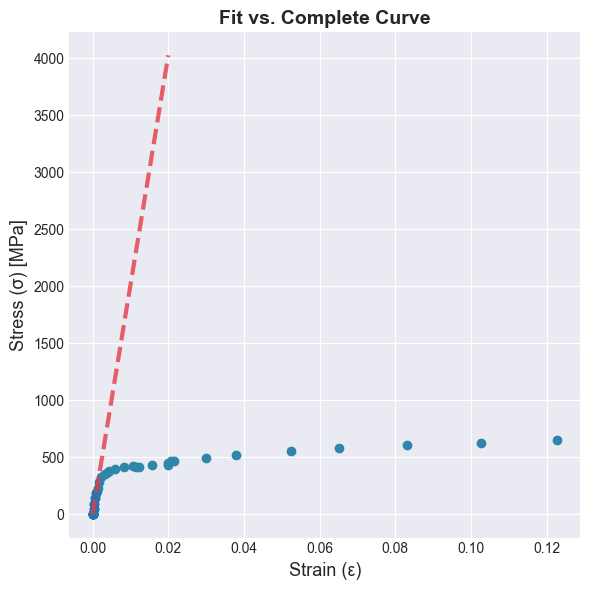

In [81]:
# Create smooth line for fitted model
strain_smooth = np.linspace(0, max_strain_linear, 100)
stress_smooth = model.predict(strain_smooth.reshape(-1, 1))

# Plot results
fig, (ax1) = plt.subplots(1, 1, figsize=(6, 6), facecolor='white')


# Right: Full curve with fit
plt.plot(strain, stress, 'o', color='#2E86AB', label='Full Data')
plt.plot(strain_linear, stress_linear, 'o', label='Linear Region')
strain_extended = np.linspace(0, 0.02, 100)
stress_extended = model.predict(strain_extended.reshape(-1, 1))
plt.xlabel('Strain (ε)', fontsize=13, fontweight='medium')
plt.ylabel('Stress (σ) [MPa]', fontsize=13, fontweight='medium')
plt.plot(strain_extended, stress_extended, '--', color='#E63946', linewidth=3, alpha=0.8)
plt.title('Fit vs. Complete Curve', fontsize=14, fontweight='bold')

#plt.xlim(0,0.005)
#plt.ylim(0,500)
plt.tight_layout()
plt.show()
